In [4]:
#Regresion Lineal
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt

dataset = ["ex1data2(Home_1f)",
              "oceano_simple",
              "petrol_consumption"]

In [7]:
def LeerDatos(filename : str, header = True):
    if (header):
        data = pd.read_csv(filename, sep ='\t', header = 0, dtype=float)
    else:
        data = pd.read_csv(filename, sep ='\t', header = None, dtype=float)
    return np.array(data.iloc[:,:])

In [8]:
def Normalizar_Datos(data : np.array):
    normal = np.empty_like(data)
    for i in range (0,np.size(data[0])):
        media = np.mean(data[:,i])
        desvi =np.std(data[:,i])
        normal[:,i] = (data[:,i] - media)/desvi
    return normal

In [9]:
def Crear_Entrenamiento_Prueba(normal : np.array):    
    train = normal
    row_size = np.size(normal[:,0])
    train_size = int(row_size * .7)
    test_size = row_size - train_size
    test = np.empty((test_size,np.size(normal[0])), dtype = float)
    for i in range(0, test_size):
        index = random.randrange(0,row_size-i)
        test[i] = train[index]
        train = np.delete(train, index,0)
    return train, test

In [10]:
def Calcular_Costo(X: np.array, y: np.array, theta: np.array):
    #J(theta) = 1/2m SUM(h(x) - y)^2
    m = np.size(X[:,0]) #numero de datos
    h = np.empty(m) #termino dentro de la sumatoria
    #Calculo de h(x)
    h = X.dot(theta.T)
    h = h - y
    return np.sum( np.square(h) ) / (2*m) , h

In [11]:
def Gradiente_Descendiente(X: np.array, y:np.array, theta:np.array,
                          num_itera:int, tasa_apren:float):
    m = np.size(X[:,0]) #numero de datos
    arr_costo = np.empty(num_itera, dtype=float)   
    #Calculo con valor inicial
    arr_costo[0], h = Calcular_Costo(X, y, theta)
    #Iteraciones
    for itera in range(1,num_itera):
        theta = theta - ( tasa_apren * (np.dot(h, X)/m))      
        arr_costo[itera], h = Calcular_Costo(X, y, theta)
        #print (arr_theta[itera])
    return arr_costo, theta

In [12]:
def Ecuacion_Normal(X :np.array , y:np.array):
    XT = np.transpose(X)
    return np.dot(np.dot( np.linalg.inv( np.dot(XT, X)) , XT) , y)

In [13]:
def InicializarXo(X: np.array):
    #Funcion para Insertar Columna X0 = 1 
    one = np.ones( np.size(X[:,0]))  
    return np.c_[ (one, X)]

In [14]:
def Error_Cuadratico_Medio(x_test: np.array, y_test: np.array, theta:np.array):
    n = np.size(y_test)
    y_calc = np.empty(n)
    y_calc = x_test.dot(theta)
    #print(x_test)
    return (np.sum(np.square(y_calc-y_test)))/n

In [15]:
#Valores Theta para la Ecuación Normal
theta_file = []
for file in range(0,len(dataset)):
        train = LeerDatos(dataset[file] + "_train.csv", False)

        X_train = InicializarXo(train[:,:-1])
        y_train = train[:,-1]
       
        theta = np.zeros( (np.size(X_train[0])))
        theta_file.append(Ecuacion_Normal(X_train,y_train))
for file in range(0,len(dataset)):
    print(dataset[file])
    print(theta_file[file])

ex1data2(Home_1f)
[0.11918988 0.9081491 ]
oceano_simple
[ 0.01175677 -0.91702608]
petrol_consumption
[ 0.03559042 -0.28714339 -0.298695   -0.10405113  0.64552554]


In [82]:
#Valores Theta para Gradiente Descendiente
theta_file = []
for file in range(0,len(dataset)):
    train = LeerDatos(dataset[file] + "_train.csv", False)

    X_train = InicializarXo(train[:,:-1])
    y_train = train[:,-1]

    theta = np.zeros( (np.size(X_train[0])))
    dummy, theta_file = (Gradiente_Descendiente(X_train, y_train, theta,500, 0.05))
    print(dataset[file])
    print(theta_file)

ex1data2(Home_1f)
[0.11918988 0.9081491 ]
oceano_simple
[ 0.01175677 -0.91702608]
petrol_consumption
[ 0.0355895  -0.287138   -0.29869607 -0.10404665  0.64552814]


In [80]:
def GenerarTablaError(dataset: []):
    arr_error = np.empty((len(dataset)))
    arr_train = np.empty((len(dataset)))
    for file in range(0,len(dataset)):
        train = LeerDatos(dataset[file] + "_train.csv", False)
        test = LeerDatos(dataset[file] + "_test.csv", False)

        X_train = InicializarXo(train[:,:-1])
        y_train = train[:,-1]

        X_test = InicializarXo(test[:,:-1])
        y_test = test[:,-1]
       
        theta = np.zeros( (np.size(X_train[0])))
        theta_norm = Ecuacion_Normal(X_train,y_train)

        arr_error[file] = Error_Cuadratico_Medio(X_test, y_test, theta_norm)
        arr_train[file] = Error_Cuadratico_Medio(X_train, y_train, theta_norm)
        #print(theta_norm)
    return pd.DataFrame(arr_train, index=dataset, columns=["MSE"]).T, pd.DataFrame(arr_error, index=dataset, columns=["MSE"]).T


In [17]:
GenerarTablaError(dataset)

(     ex1data2(Home_1f)  oceano_simple  petrol_consumption
 MSE           0.265738       0.158686            0.333132,
      ex1data2(Home_1f)  oceano_simple  petrol_consumption
 MSE           0.329316       0.139772            0.308714)

In [65]:
def BusquedaParametros(dataset: []):
    tasa_aprendizaje = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
    iteraciones = range(500,3501,500)
    
    for file in range(0,len(dataset)):
        print("Dataset: ", dataset[file])
        arr_error = np.empty( (len(tasa_aprendizaje),len(iteraciones) ))
        train = LeerDatos(dataset[file] + "_train.csv", False)
        test = LeerDatos(dataset[file] + "_test.csv", False)

        X_train = InicializarXo(train[:,:-1])
        y_train = train[:,-1]

        X_test = InicializarXo(test[:,:-1])
        y_test = test[:,-1]
       
        theta = np.zeros( (np.size(X_train[0])))
        for tasa in range(0,len(tasa_aprendizaje)):
            for iter in range(0,len(iteraciones)):
                dummy, theta_grad = Gradiente_Descendiente(X_train, y_train, theta,
                                                           iteraciones[iter], tasa_aprendizaje[tasa])
                #print ("theta_grad", theta_grad)
                arr_error[tasa,iter] = Error_Cuadratico_Medio(X_test, y_test, theta_grad)
        print (pd.DataFrame(arr_error, index = tasa_aprendizaje, columns = iteraciones))

In [66]:
BusquedaParametros(dataset)

Dataset:  ex1data2(Home_1f)
           500      1000      1500      2000      2500      3000      3500
0.01  0.327403  0.329307  0.329316  0.329316  0.329316  0.329316  0.329316
0.05  0.329316  0.329316  0.329316  0.329316  0.329316  0.329316  0.329316
0.10  0.329316  0.329316  0.329316  0.329316  0.329316  0.329316  0.329316
0.20  0.329316  0.329316  0.329316  0.329316  0.329316  0.329316  0.329316
0.30  0.329316  0.329316  0.329316  0.329316  0.329316  0.329316  0.329316
0.40  0.329316  0.329316  0.329316  0.329316  0.329316  0.329316  0.329316
Dataset:  oceano_simple
           500      1000      1500      2000      2500      3000      3500
0.01  0.139973  0.139774  0.139772  0.139772  0.139772  0.139772  0.139772
0.05  0.139772  0.139772  0.139772  0.139772  0.139772  0.139772  0.139772
0.10  0.139772  0.139772  0.139772  0.139772  0.139772  0.139772  0.139772
0.20  0.139772  0.139772  0.139772  0.139772  0.139772  0.139772  0.139772
0.30  0.139772  0.139772  0.139772  0.139772  0.

In [19]:
def PloteoDatasetUnico(dataset:[], data:int, tasa, iteraciones, theta_comp):
    print("Dataset: ", dataset[data])
    arr_theta = []
    train = LeerDatos(dataset[data] + "_train.csv", False)
    test = LeerDatos(dataset[data] + "_test.csv", False)

    X_train = InicializarXo(train[:,:-1])
    y_train = train[:,-1]

    X_test = InicializarXo(test[:,:-1])
       
    theta = np.zeros( (np.size(X_train[0])))
 
    dummy, theta_grad = Gradiente_Descendiente(X_train, y_train, theta,
                                                        iteraciones, tasa)
    #print ("theta", theta_grad)
         
    arr_theta.append(theta_grad)
    print (pd.DataFrame(arr_theta))

    fig, ax = plt.subplots()
    #Ploteo de Puntos
    scale = 10.0
    color = 'tab:blue'
    ax.scatter(X_train[:,1:], y_train, c=color, s=scale, label = color,
               alpha=0.9, edgecolors='none')

    #Plotea Recta Gradiente
    x_lim = np.array([-4,4])
    y_lim = np.empty_like(x_lim)
    for i in range(0,2):
        y_lim[i] = np.sum(x_lim[i] * np.transpose(theta_grad))
    print(y_lim)
    plt.plot(x_lim, y_lim, 'b-')
    
    y_normal = np.empty_like(x_lim)
    for i in range(0,2):
        y_normal[i] = np.sum(x_lim[i] * np.transpose(theta_comp))
    plt.plot(x_lim, y_normal, 'r--')

    plt.title(dataset[data], {'fontsize':10})
    ax.set(xlim =x_lim, ylim = (-4,4))
    ax.grid(True)
    plt.show()

Dataset:  ex1data2(Home_1f)
         0         1
0  0.11919  0.908149
[-4  4]


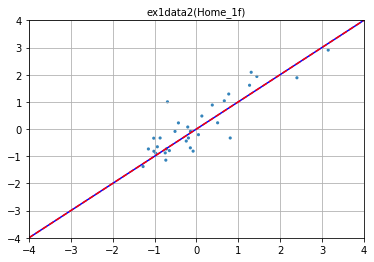

In [20]:
PloteoDatasetUnico(dataset,0 , 0.1, 1500, theta_file[0])

Dataset:  oceano_simple
          0         1
0  0.011757 -0.917026
[ 3 -3]


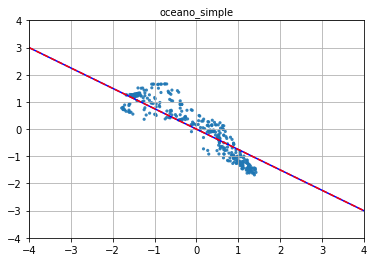

In [21]:
PloteoDatasetUnico(dataset,1 , 0.1, 500, theta_file[1])

In [22]:
def CostoGradienteDescendiente (dataset:[], data:int, tasa, iteraciones):
    #print("Dataset: ", dataset[data])
    #arr_theta = []
    train = LeerDatos(dataset[data] + "_train.csv", False)
    test = LeerDatos(dataset[data] + "_test.csv", False)

    X_train = InicializarXo(train[:,:-1])
    y_train = train[:,-1]

    X_test = InicializarXo(test[:,:-1])
    y_test = test[:,-1]
       
    theta = np.zeros( (np.size(X_train[0])))
 
    arr_costo_train, theta_grad = Gradiente_Descendiente(X_train, y_train, theta,
                                                        iteraciones, tasa)
    
    arr_costo_test, theta_grad = Gradiente_Descendiente(X_test, y_test, theta,
                                                        iteraciones, tasa)
    return arr_costo_train, arr_costo_test

In [47]:
costo_vivienda_train, costo_vivienda_test = CostoGradienteDescendiente(dataset, 0, 0.05,500)
costo_temperatura_train, costo_temperatura_test = CostoGradienteDescendiente(dataset, 1, 0.05,500)
costo_petroleo_train, costo_petroleo_test = CostoGradienteDescendiente(dataset, 2, 0.05,500)

Dataset:  ex1data2(Home_1f)
Dataset:  oceano_simple
Dataset:  petrol_consumption


In [48]:
def PloteoCurvaCosto (dataset:[], data:int, tasa, iteraciones, arr: np.array, title):       
    #arr_theta.append(theta_grad[-1])
    #print (pd.DataFrame(arr))
    fig, ax = plt.subplots()
    #Ploteo de Curva
    scale = 1.0
    color = 'tab:blue'
    plt.plot(range(0,iteraciones), arr, 'o', linewidth=1, markersize=2 )

    plt.title(title, {'fontsize':10})
    ax.set(xlim = [-50,iteraciones], ylim = (0,arr[0]))
    ax.grid(True)
    plt.show()

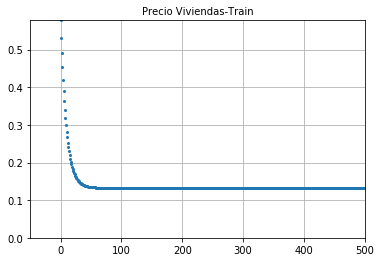

In [49]:
PloteoCurvaCosto(dataset,0, 0.05, 500, costo_vivienda_train, "Precio Viviendas-Train")

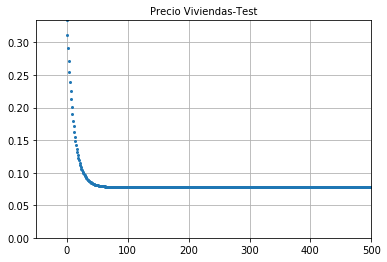

In [50]:
PloteoCurvaCosto(dataset,0, 0.05, 500, costo_vivienda_test, "Precio Viviendas-Test")

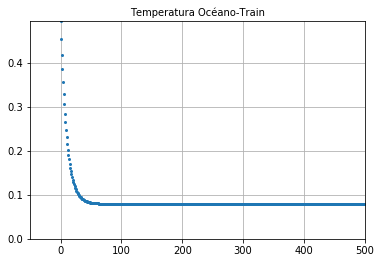

In [52]:
PloteoCurvaCosto(dataset,1, 0.05,500, costo_temperatura_train, "Temperatura Océano-Train" )

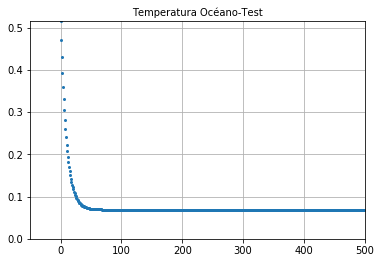

In [54]:
PloteoCurvaCosto(dataset,1, 0.05,500, costo_temperatura_test, "Temperatura Océano-Test" )

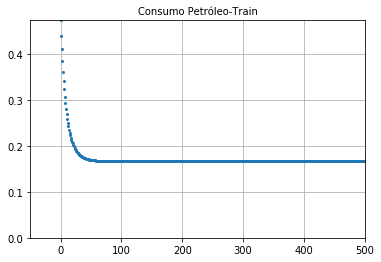

In [56]:
PloteoCurvaCosto(dataset,1, 0.05,500, costo_petroleo_train, "Consumo Petróleo-Train" )

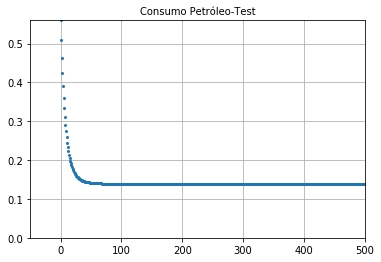

In [55]:
PloteoCurvaCosto(dataset,1, 0.05,500, costo_petroleo_test, "Consumo Petróleo-Test" )